## Classification example

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data

In [2]:
diabetes = pd.read_csv("files/pima-indians-diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Normalize columns

In [5]:
cols_to_normalize = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
#When axis=0(default), applies function to each column
#When axis=1, applies function to each row
diabetes[cols_to_normalize] = diabetes[cols_to_normalize].apply(lambda x: (x-x.min())/(x.max()-x.min()),axis=0) 

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### OneHotEncode Age and Group

> Age should be encoded because we want our model to treat all ages unbiased.

> However, we do not want to use **one hot encoding** for all age numbers. So we just bin them

**Bin the age**

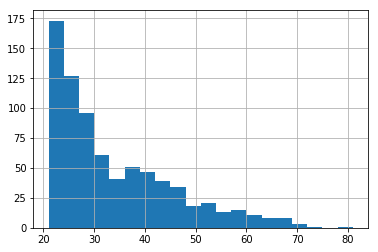

In [96]:
diabetes["Age"].hist(bins=20)

In [99]:
cols = diabetes.columns
arr = diabetes.values

age = arr[:,7]
age_categories = [10,20,25,30,35,40,45,50,60,70,80,90,100]
bins = [(0,10),(11,20),(21,25),(25,30),(31,35),(36,40),(41,45),(46,50),(51,60),(61,70),(71,80),(81,90),(91,100)]
for b in bins:
    #cannot use 'and'. The format of logical and inside np.where is important 
    age = np.where((age>=b[0])&(age<=b[1]),b[1],age)
age[:20]

array([50, 35, 35, 30, 35, 30, 30, 30, 60, 60, 30, 35, 60, 60, 60, 35, 35,
       35, 35, 35], dtype=object)

In [100]:
arr[:,7] = age
pd.DataFrame(arr,columns=cols).head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0,0.500745,0.234415,50,1,B
1,0.0588235,0.427136,0.540984,0.292929,0,0.396423,0.116567,35,0,C
2,0.470588,0.919598,0.52459,0,0,0.347243,0.253629,35,1,B
3,0.0588235,0.447236,0.540984,0.232323,0.111111,0.418778,0.0380017,30,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,35,1,C


**Encode**

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

See **Refresher_sklearn** for details

In [101]:
colT = ColumnTransformer([("1",OneHotEncoder(),[9]),("2",OneHotEncoder(categories=[age_categories]),[7])])
colT_fit = colT.fit(arr)
np.array(colT_fit.get_feature_names())

array(['1__x0_A', '1__x0_B', '1__x0_C', '1__x0_D', '2__x0_10', '2__x0_20',
       '2__x0_25', '2__x0_30', '2__x0_35', '2__x0_40', '2__x0_45',
       '2__x0_50', '2__x0_60', '2__x0_70', '2__x0_80', '2__x0_90',
       '2__x0_100'], dtype='<U9')

In [102]:
tr = colT_fit.transform(arr).toarray() #Returns just the transformed cols
print(tr.shape, arr.shape)
features = np.concatenate((arr[:,[0,1,2,3,4,5,6,8]],tr),axis=1) #specify all columns excetp 7 and 9
print(features.shape)

(768, 17) (768, 10)
(768, 25)


In [104]:
pd.DataFrame(features).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.352941,0.743719,0.590164,0.353535,0,0.500745,0.234415,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.0588235,0.427136,0.540984,0.292929,0,0.396423,0.116567,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.470588,0.919598,0.52459,0,0,0.347243,0.253629,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.0588235,0.447236,0.540984,0.232323,0.111111,0.418778,0.0380017,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,1,0,0,...,0,1,0,0,0,0,0,0,0,0
